In [ ]:
import pandas as pd


df = pd.read_csv("/content/drive/MyDrive/데분 부캠/관광 데이터/2024_tourism_data_utf8.csv")

In [ ]:
# 주요 방한 목적이 1. 여가, 위락, 휴식, 2. 친구, 친지 방문인 데이터만 필터링
# 근거: 1. 관광객 유치를 위한 분석임
#       2. 설문지의 응답이 방한 목적 1, 2인 사람 위주

df = df[df['Q1'].isin([1, 2])]

In [ ]:
# 회귀 분석에 넣을 변수 선택
# 만족도에 영향이 있을 것으로 예상되는 컬럼. 종속변수: 전반적 만족도[Q11]
# 단기일일투어 상품 이용 여부[Q6], 동반자 유무[Q7A], 참여한 활동[Q8a01 ~ Q8a20], 방문 지역[Q9_2a01 ~ Q9_2a17], 총 체재 기간[M일HAP] (카테고리화 되어있는 [R일HAP]컬럼은 이상치가 있어서 새로 카테고리 만들기)
# 주요 이용 숙박 시설[Q9_5A1 ~ Q9_5A9], 쇼핑 항목[Q10_2a01 ~ Q10_2a13], 계절[D_MON] 이용해서 카테고리화, 국가[D_NAT], 성별[D_SEX], 연령[D_AGE], 여행 형태[D_GUB]

In [ ]:
# M일HAP 값을 카테고리로 변환
def categorize_days(days):
    if pd.isna(days):
        return None
    if days <= 3:
        return 1
    elif days <= 7:
        return 2
    elif days <= 10:
        return 3
    elif days <= 30:
        return 4
    elif days <= 60:
        return 5
    else:
        return 12

# 새로운 컬럼으로 추가
df['M일HAP_cat'] = df['M일HAP'].apply(categorize_days)


In [ ]:
# 계절 구분 함수: 3~5 봄, 6~8 여름, 9~11 가을, 12~2 겨울
def categorize_season(month):
    if pd.isna(month):
        return None
    if month in [3, 4, 5]:
        return 1  # 봄
    elif month in [6, 7, 8]:
        return 2  # 여름
    elif month in [9, 10, 11]:
        return 3  # 가을
    else:
        return 4  # 겨울

# 새로운 컬럼 생성
df['season'] = df['D_MON'].apply(categorize_season)


In [ ]:
# 사용할 컬럼 목록 정의
columns_to_keep = (
    ['Q11', 'Q7A', 'M일HAP_cat', 'season', 'D_NAT', 'D_SEX', 'D_AGE', 'D_GUB'] +
    [f'Q8a{str(i).zfill(2)}' for i in range(1, 21)] +
    [f'Q9_2a{str(i).zfill(2)}' for i in range(1, 18)] +
    [f'Q9_5A{i}' for i in range(1, 10)] +
    [f'Q10_2a{str(i).zfill(2)}' for i in range(1, 14)]
)

# 존재하는 컬럼만 필터링 (오타 방지용)
columns_to_keep = [col for col in columns_to_keep if col in df.columns]

# 필요한 컬럼만 남기기
df = df[columns_to_keep]

In [ ]:
df

,Q11,Q7A,M일HAP_cat,season,D_NAT,D_SEX,D_AGE,D_GUB,Q8a01,Q8a02,...,Q10_2a04,Q10_2a05,Q10_2a06,Q10_2a07,Q10_2a08,Q10_2a09,Q10_2a10,Q10_2a11,Q10_2a12,Q10_2a13
0,5,2,2,4,13,2,5,1,NaN,2.0,...,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,5,2,2,4,3,2,4,1,1.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,4,2,2,4,3,2,3,1,1.0,2.0,...,NaN,NaN,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,5,1,2,4,1,1,2,1,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,2,2,4,3,2,2,1,NaN,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16211,4,2,2,4,1,2,4,1,1.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,10.0,NaN,NaN,NaN
16212,5,2,2,4,1,1,4,1,1.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16213,4,2,2,4,1,2,5,1,1.0,2.0,...,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16214,5,2,2,4,1,1,5,1,1.0,2.0,...,NaN,NaN,NaN,7.0,NaN,NaN,NaN,NaN,NaN,NaN


/tmp/ipython-input-8-1873547556.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=q11_counts.index, y=q11_counts.values, palette='viridis')


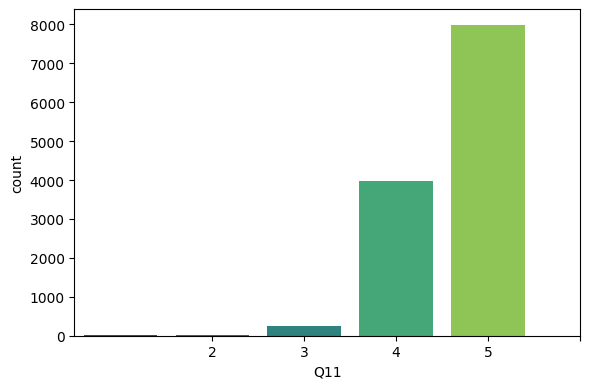

Q11
1      24
2      21
3     245
4    3978
5    7993
Name: count, dtype: int64


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Q11 값 분포 확인
q11_counts = df['Q11'].value_counts().sort_index()

# 시각화
plt.figure(figsize=(6, 4))
sns.barplot(x=q11_counts.index, y=q11_counts.values, palette='viridis')
plt.xlabel('Q11')
plt.ylabel('count')
plt.title('')
plt.xticks([1, 2, 3, 4, 5])
plt.tight_layout()
plt.show()

print(df['Q11'].value_counts().sort_index())

# 만족도 분포가 한쪽으로 치우쳐 있어 왜곡될 수 있음. (모델이 무조건 '5점 예측'만 해도 꽤 높은 정확도)
# 그래서 이진 분류가 더 적합
# 회귀, 분류 둘 다 돌려보고 변수 중요도나 결과 해석을 비교해보기

In [ ]:
# 만족도 분포가 한쪽으로 치우쳐 있어 왜곡될 수 있음. (모델이 무조건 '5점 예측'만 해도 꽤 높은 정확도)
# 그래서 이진 분류가 더 적합
# 회귀, 분류 둘 다 돌려보고 변수 중요도나 결과 해석을 비교해보기

In [ ]:
# 여러가지 중에 하나 선택한 항목인 컬럼을 원 핫 인코딩 형식으로 변경
# 각 컬럼별로 값이 있으면 1, 없으면 0 (NaN 포함)

# Q8a01 ~ Q8a20
cols_Q8a = [f'Q8a{str(i).zfill(2)}' for i in range(1, 21)]

# Q9_2a01 ~ Q9_2a17
cols_Q9_2a = [f'Q9_2a{str(i).zfill(2)}' for i in range(1, 18)]

# Q9_5A1 ~ Q9_5A9
cols_Q9_5A = [f'Q9_5A{i}' for i in range(1, 10)]

# Q10_2a01 ~ Q10_2a13
cols_Q10_2a = [f'Q10_2a{str(i).zfill(2)}' for i in range(1, 14)]

all_cols = cols_Q8a + cols_Q9_2a + cols_Q9_5A + cols_Q10_2a

df[all_cols] = df[all_cols].notna().astype(int)

In [ ]:
pd.set_option('display.max_columns', None)
df


,Q11,Q7A,M일HAP_cat,season,D_NAT,D_SEX,D_AGE,D_GUB,Q8a01,Q8a02,Q8a03,Q8a04,Q8a05,Q8a06,Q8a07,Q8a08,Q8a09,Q8a10,Q8a11,Q8a12,Q8a13,Q8a14,Q8a15,Q8a16,Q8a17,Q8a18,Q8a19,Q8a20,Q9_2a01,Q9_2a02,Q9_2a03,Q9_2a04,Q9_2a05,Q9_2a06,Q9_2a07,Q9_2a08,Q9_2a09,Q9_2a10,Q9_2a11,Q9_2a12,Q9_2a13,Q9_2a14,Q9_2a15,Q9_2a16,Q9_2a17,Q9_5A1,Q9_5A2,Q9_5A3,Q9_5A4,Q9_5A5,Q9_5A6,Q9_5A7,Q9_5A8,Q9_5A9,Q10_2a01,Q10_2a02,Q10_2a03,Q10_2a04,Q10_2a05,Q10_2a06,Q10_2a07,Q10_2a08,Q10_2a09,Q10_2a10,Q10_2a11,Q10_2a12,Q10_2a13
0,5,2,2,4,13,2,5,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0
1,5,2,2,4,3,2,4,1,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0
2,4,2,2,4,3,2,3,1,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0
3,5,1,2,4,1,1,2,1,1,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0
4,4,2,2,4,3,2,2,1,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16211,4,2,2,4,1,2,4,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
16212,5,2,2,4,1,1,4,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
16213,4,2,2,4,1,2,5,1,1,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0
16214,5,2,2,4,1,1,5,1,1,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0


In [ ]:
from sklearn.model_selection import train_test_split

# 데이터 준비
X = df.drop(columns=['Q11'])
y = df['Q11']

# 학습/테스트 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

In [ ]:
# 랜덤 포레스트 회귀
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("MSE:", mean_squared_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R2 score:", r2_score(y_test, y_pred))

MSE: 0.30171292977309105
RMSE: 0.5492840155812756
R2 score: 0.015238024841577769


/tmp/ipython-input-14-4220791070.py:12: UserWarning: Glyph 51068 (\N{HANGUL SYLLABLE IL}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51068 (\N{HANGUL SYLLABLE IL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


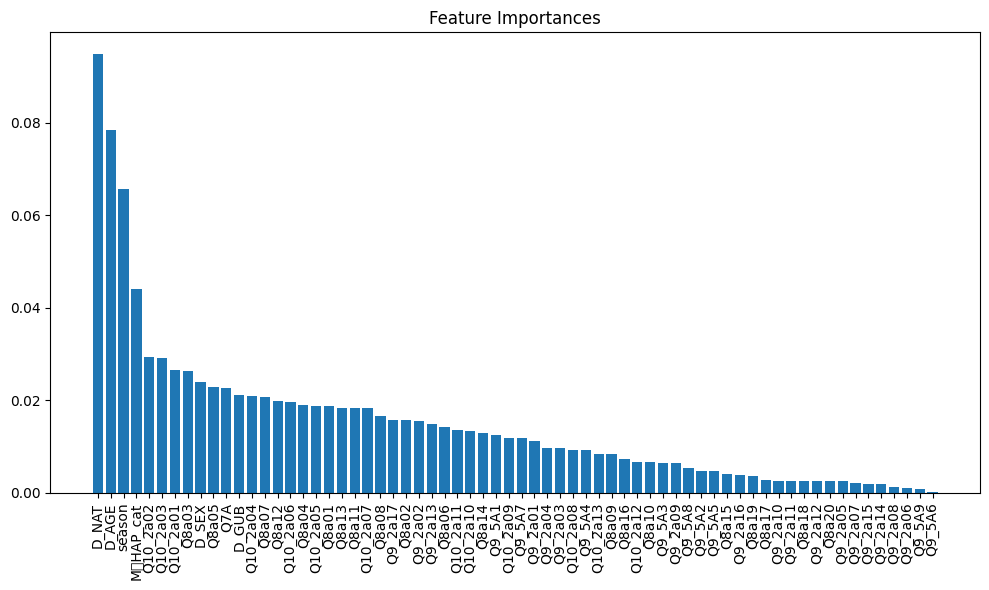

<Axes: xlabel='Q11', ylabel='count'>

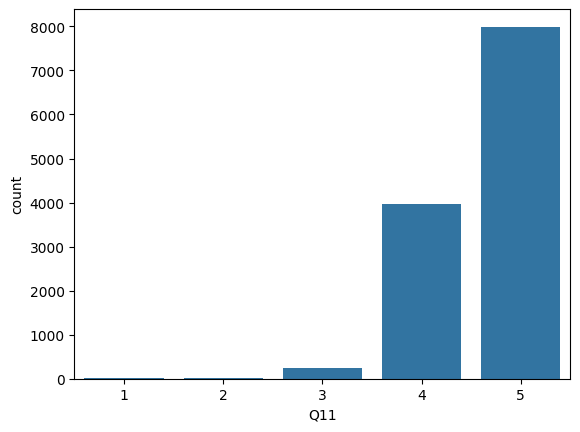

In [ ]:
# 변수 중요도 확인
import matplotlib.pyplot as plt
import numpy as np

importances = model.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10,6))
plt.title("Feature Importances")
plt.bar(range(len(X.columns)), importances[indices], align='center')
plt.xticks(range(len(X.columns)), [X.columns[i] for i in indices], rotation=90)
plt.tight_layout()
plt.show()

# 만족도 분포 확인
import seaborn as sns

sns.countplot(x=y)

In [ ]:
# XGBoost 회귀
import xgboost as xgb
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

# 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 모델 생성 및 학습
model = xgb.XGBRegressor(random_state=42, n_estimators=100, learning_rate=0.1)
model.fit(X_train, y_train)

# 예측
y_pred = model.predict(X_test)

# 평가
rmse = mean_squared_error(y_test, y_pred) ** 0.5
r2 = r2_score(y_test, y_pred)

print(f"RMSE: {rmse:.4f}")
print(f"R2 score: {r2:.4f}")

RMSE: 0.5406
R2 score: 0.0461


In [ ]:
# 회귀 모델 둘 다 똥이라 분류 모델로 테스트 해보기 위해서 [Q11] 만족도 4,5를 ‘만족(1)’, 1~3을 ‘불만(0)’으로 이진 분류
df['Q11_binary'] = df['Q11'].apply(lambda x: 1 if x >= 4 else 0)

In [ ]:
# 분류 모델 데이터 준비
X = df.drop(columns=['Q11', 'Q11_binary'])
y = df['Q11_binary']

In [ ]:
# XGBoost 분류
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

model = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:,1]

print("Accuracy:", accuracy_score(y_test, y_pred))
print("ROC AUC:", roc_auc_score(y_test, y_pred_proba))
print(classification_report(y_test, y_pred))

# 정확도는 높지만 AUC는 낮게 나옴 -> 클래스 불균형

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [18:04:42] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Accuracy: 0.9783938035059111
ROC AUC: 0.6602044025157233
              precision    recall  f1-score   support

           0       0.50      0.08      0.13        53
           1       0.98      1.00      0.99      2400

    accuracy                           0.98      2453
   macro avg       0.74      0.54      0.56      2453
weighted avg       0.97      0.98      0.97      2453



In [ ]:
# XGBoost 분류에서 불균형을 맞춰주기 위해 하이퍼파라미터 scale_pos_weight 조절
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split

# y 이진분류 타깃 (0: 불만족, 1: 만족)
X = df.drop(columns=['Q11', 'Q11_binary'])
y = df['Q11_binary']

# 학습/테스트 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 클래스 불균형 비율 계산
neg, pos = y_train.value_counts()[0], y_train.value_counts()[1]
ratio = neg / pos
print(f"scale_pos_weight: {ratio:.2f}")

# 모델 학습
model = XGBClassifier(
    random_state=42,
    scale_pos_weight=ratio,
    eval_metric='logloss'
)

model.fit(X_train, y_train)

from sklearn.metrics import classification_report, roc_auc_score, accuracy_score

y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1]

print("Accuracy:", accuracy_score(y_test, y_pred))
print("ROC AUC:", roc_auc_score(y_test, y_pred_proba))
print(classification_report(y_test, y_pred))

# 여전히 구림

scale_pos_weight: 0.02
Accuracy: 0.8907460252751732
ROC AUC: 0.6544811320754718
              precision    recall  f1-score   support

           0       0.06      0.30      0.11        53
           1       0.98      0.90      0.94      2400

    accuracy                           0.89      2453
   macro avg       0.52      0.60      0.52      2453
weighted avg       0.96      0.89      0.92      2453



In [ ]:
pip install imbalanced-learn

In [ ]:
X_train_dropna = X_train.dropna()
y_train_dropna = y_train[X_train_dropna.index]

In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.impute import SimpleImputer
import pandas as pd

# 1. 결측치 있는 행 제거
X_train_dropna = X_train.dropna()
y_train_dropna = y_train.loc[X_train_dropna.index]

# 2. SMOTE 적용
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train_dropna, y_train_dropna)

# 3. 모델 학습
rf = RandomForestClassifier(
    random_state=42,
    n_jobs=-1,
    class_weight='balanced'
)
rf.fit(X_train_smote, y_train_smote)

# 4. 테스트 데이터 결측치 처리
imputer = SimpleImputer(strategy='mean')
X_test_imputed = imputer.fit_transform(X_test)
X_test_imputed_df = pd.DataFrame(X_test_imputed, columns=X_test.columns)

# 5. 예측 및 평가
y_pred = rf.predict(X_test_imputed_df)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.12      0.09      0.10        53
           1       0.98      0.98      0.98      2400

    accuracy                           0.96      2453
   macro avg       0.55      0.54      0.54      2453
weighted avg       0.96      0.96      0.96      2453



/tmp/ipython-input-23-2725178974.py:14: UserWarning: Glyph 51068 (\N{HANGUL SYLLABLE IL}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51068 (\N{HANGUL SYLLABLE IL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


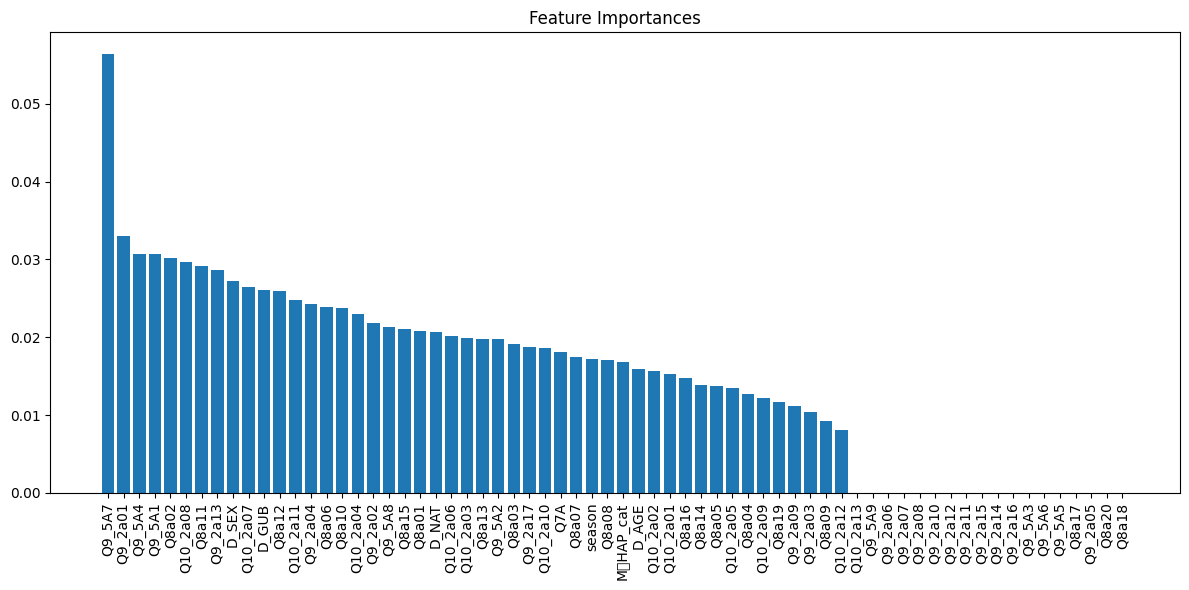

In [ ]:
# 변수 중요도 확인

import matplotlib.pyplot as plt
import numpy as np

importances = model.feature_importances_
indices = np.argsort(importances)[::-1]
features = X.columns

plt.figure(figsize=(12, 6))
plt.title("Feature Importances")
plt.bar(range(len(features)), importances[indices], align="center")
plt.xticks(range(len(features)), features[indices], rotation=90)
plt.tight_layout()
plt.show()

In [ ]:
import pandas as pd

importances = model.feature_importances_
feature_names = X.columns

importance_df = pd.DataFrame({
    'feature': feature_names,
    'importance': importances
}).sort_values(by='importance', ascending=False)

print(importance_df.head(20))  # 상위 20개만 예시

     feature  importance
50    Q9_5A7    0.056350
27   Q9_2a01    0.032997
47    Q9_5A4    0.030692
44    Q9_5A1    0.030668
8      Q8a02    0.030135
60  Q10_2a08    0.029614
17     Q8a11    0.029211
39   Q9_2a13    0.028622
4      D_SEX    0.027218
59  Q10_2a07    0.026480
6      D_GUB    0.026069
18     Q8a12    0.025896
63  Q10_2a11    0.024822
30   Q9_2a04    0.024259
12     Q8a06    0.023860
16     Q8a10    0.023697
56  Q10_2a04    0.022935
28   Q9_2a02    0.021885
51    Q9_5A8    0.021256
21     Q8a15    0.021080


W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sources.list entry misspelt?)


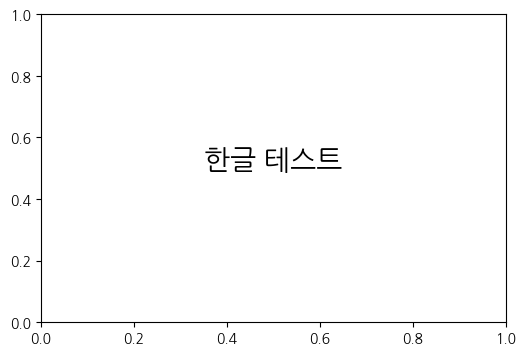

In [ ]:
!apt-get update -qq
!apt-get install -y fonts-nanum* -qq

import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
from matplotlib import rc
import matplotlib as mpl
import os

# 1) 캐시 위치 찾기
cache_dir = mpl.get_cachedir()
font_cache_files = [f for f in os.listdir(cache_dir) if 'fontlist' in f]

# 2) 캐시 삭제
for f in font_cache_files:
    path = os.path.join(cache_dir, f)
    if os.path.exists(path):
        os.remove(path)

# 3) 캐시 재생성
fm.fontManager = fm.FontManager()

# 4) 폰트 설정
font_path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
font_prop = fm.FontProperties(fname=font_path)
rc('font', family=font_prop.get_name())

# 5) 한글 출력 테스트
plt.figure(figsize=(6,4))
plt.text(0.5, 0.5, '한글 테스트', fontsize=20, ha='center')
plt.show()

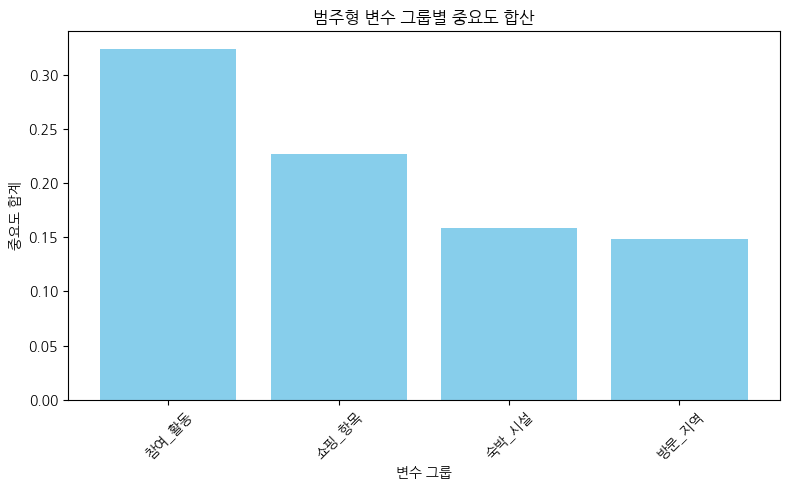

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# importance_df: feature, importance 컬럼을 가진 데이터프레임 (이미 있다고 가정)

# 범주형 변수 그룹 지정 (예시는 질문하신 데이터 기준)
group_vars = {
    '숙박_시설': [f'Q9_5A{i}' for i in range(1, 10)],
    '참여_활동': [f'Q8a{str(i).zfill(2)}' for i in range(1, 21)],
    '방문_지역': [f'Q9_2a{str(i).zfill(2)}' for i in range(1, 18)],
    '쇼핑_항목': [f'Q10_2a{str(i).zfill(2)}' for i in range(1, 14)],
    # 필요한 그룹 더 추가 가능
}

# 그룹별 중요도 합산
group_importance = {}
for group_name, cols in group_vars.items():
    group_sum = importance_df[importance_df['feature'].isin(cols)]['importance'].sum()
    group_importance[group_name] = group_sum

# 데이터프레임으로 변환
group_importance_df = pd.DataFrame(list(group_importance.items()), columns=['Group', 'Importance'])
group_importance_df = group_importance_df.sort_values(by='Importance', ascending=False)

# 시각화
plt.figure(figsize=(8, 5))
plt.bar(group_importance_df['Group'], group_importance_df['Importance'], color='skyblue')
plt.title('범주형 변수 그룹별 중요도 합산')
plt.ylabel('중요도 합계')
plt.xlabel('변수 그룹')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

                          importance
참여 활동(Q8a01~Q8a20)          0.151677
숙박 시설(Q9_5A1~Q9_5A9)        0.102306
방문 지역(Q9_2a01~Q9_2a17)      0.077021
쇼핑 항목(Q10_2a01~Q10_2a13)    0.074570
Q6                          0.026119
D_SEX                       0.023816
Q7A                         0.021830
D_NAT                       0.021034
D_GUB                       0.020284


<Figure size 1200x600 with 0 Axes>

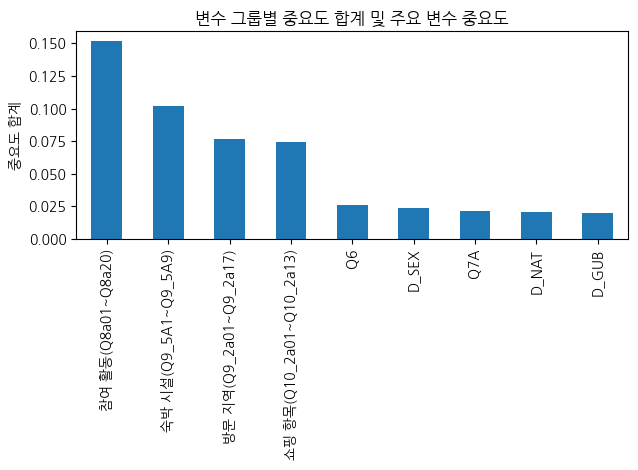

In [ ]:
fi = pd.DataFrame({
    'feature': ['Q9_5A7', 'Q8a02', 'Q9_5A1', 'Q10_2a11', 'Q9_2a01', 'Q8a06', 'Q9_2a13', 'D_SEX', 'Q8a03',
                'Q8a15', 'Q10_2a08', 'Q7A', 'Q8a11', 'D_NAT', 'Q8a01', 'Q9_5A8', 'Q10_2a09', 'D_GUB', 'Q9_2a17'],
    'importance': [0.049894, 0.033963, 0.032101, 0.030758, 0.029935, 0.028700, 0.026848, 0.026119, 0.023816, 0.023560,
                   0.023557, 0.023524, 0.021830, 0.021552, 0.021034, 0.020345, 0.020311, 0.020288, 0.020284, 0.020238]
})

# 원핫 인코딩된 변수 그룹
group_dict = {
    '숙박 시설(Q9_5A1~Q9_5A9)': [f'Q9_5A{i}' for i in range(1, 10)],
    '참여 활동(Q8a01~Q8a20)': [f'Q8a{str(i).zfill(2)}' for i in range(1, 21)],
    '방문 지역(Q9_2a01~Q9_2a17)': [f'Q9_2a{str(i).zfill(2)}' for i in range(1, 18)],
    '쇼핑 항목(Q10_2a01~Q10_2a13)': [f'Q10_2a{str(i).zfill(2)}' for i in range(1, 14)],
}

group_importance = {}

# 그룹별 중요도 합산
for group_name, cols in group_dict.items():
    group_importance[group_name] = fi.loc[fi['feature'].isin(cols), 'importance'].sum()

# 원핫 인코딩 안 된 변수들 직접 추가
non_ohe_vars = ['Q7A', 'D_SEX', 'D_NAT', 'D_GUB']

for var in non_ohe_vars:
    group_importance[var] = fi.loc[fi['feature'] == var, 'importance'].sum()

# 결과 DataFrame 변환 및 정렬
group_importance_df = pd.DataFrame.from_dict(group_importance, orient='index', columns=['importance'])
group_importance_df = group_importance_df.sort_values(by='importance', ascending=False)

print(group_importance_df)

# 시각화
plt.figure(figsize=(12,6))
group_importance_df.plot(kind='bar', legend=False)
plt.title('변수 그룹별 중요도 합계 및 주요 변수 중요도')
plt.ylabel('중요도 합계')
plt.tight_layout()
plt.show()

In [ ]:
# 예: Q9_5A 그룹 내 중요도 분포 확인
q9_5a_features = [f'Q9_5A{i}' for i in range(1, 10)]
fi_q9_5a = fi[fi['feature'].isin(q9_5a_features)].sort_values(by='importance', ascending=False)

print(fi_q9_5a)

# 중요도 낮은 피처 리스트 추출 예시 (중요도 0.01 미만)
low_importance_features = fi_q9_5a[fi_q9_5a['importance'] < 0.01]['feature'].tolist()

print("제외 후보 피처:", low_importance_features)

   feature  importance
0   Q9_5A7    0.049894
2   Q9_5A1    0.032101
16  Q9_5A8    0.020311
제외 후보 피처: []


In [ ]:
# 범주형 변수 전체 컬럼 리스트
# cols_Q9_5A = [f'Q9_5A{i}' for i in range(1, 10)]
cols_Q8a = [f'Q8a{str(i).zfill(2)}' for i in range(1, 21)]
cols_Q9_2a = [f'Q9_2a{str(i).zfill(2)}' for i in range(1, 18)]
cols_Q10_2a = [f'Q10_2a{str(i).zfill(2)}' for i in range(1, 14)]

# 단일 변수들 (중요 변수 중 범주형 리스트에 없는 변수)
single_vars = ['D_SEX', 'Q7A', 'D_GUB'] # D_NAT 빼봄

# 최종 선택 변수 리스트: 범주형 전체 + 단일 변수
# selected_features = cols_Q9_5A + cols_Q8a + cols_Q9_2a + cols_Q10_2a + single_vars
selected_features = cols_Q8a + cols_Q9_2a + cols_Q10_2a + single_vars

# 타겟 변수 포함
selected_features_with_target = ['Q11'] + selected_features

# 새로운 데이터프레임 생성
df_selected = df[selected_features_with_target]

df_selected

,Q11,Q8a01,Q8a02,Q8a03,Q8a04,Q8a05,Q8a06,Q8a07,Q8a08,Q8a09,Q8a10,Q8a11,Q8a12,Q8a13,Q8a14,Q8a15,Q8a16,Q8a17,Q8a18,Q8a19,Q8a20,Q9_2a01,Q9_2a02,Q9_2a03,Q9_2a04,Q9_2a05,Q9_2a06,Q9_2a07,Q9_2a08,Q9_2a09,Q9_2a10,Q9_2a11,Q9_2a12,Q9_2a13,Q9_2a14,Q9_2a15,Q9_2a16,Q9_2a17,Q10_2a01,Q10_2a02,Q10_2a03,Q10_2a04,Q10_2a05,Q10_2a06,Q10_2a07,Q10_2a08,Q10_2a09,Q10_2a10,Q10_2a11,Q10_2a12,Q10_2a13,D_SEX,Q7A,D_GUB
0,5,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,2,2,1
1,5,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,2,2,1
2,4,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,2,2,1
3,5,1,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,1,1,1
4,4,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,2,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16211,4,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,2,2,1
16212,5,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,2,1
16213,4,1,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,1,0,0,0,0,0,0,0,0,2,2,1
16214,5,1,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,1,0,0,0,0,0,0,1,2,1


In [ ]:
print(df_selected.isnull().sum())

Q11         0
Q8a01       0
Q8a02       0
Q8a03       0
Q8a04       0
Q8a05       0
Q8a06       0
Q8a07       0
Q8a08       0
Q8a09       0
Q8a10       0
Q8a11       0
Q8a12       0
Q8a13       0
Q8a14       0
Q8a15       0
Q8a16       0
Q8a17       0
Q8a18       0
Q8a19       0
Q8a20       0
Q9_2a01     0
Q9_2a02     0
Q9_2a03     0
Q9_2a04     0
Q9_2a05     0
Q9_2a06     0
Q9_2a07     0
Q9_2a08     0
Q9_2a09     0
Q9_2a10     0
Q9_2a11     0
Q9_2a12     0
Q9_2a13     0
Q9_2a14     0
Q9_2a15     0
Q9_2a16     0
Q9_2a17     0
Q10_2a01    0
Q10_2a02    0
Q10_2a03    0
Q10_2a04    0
Q10_2a05    0
Q10_2a06    0
Q10_2a07    0
Q10_2a08    0
Q10_2a09    0
Q10_2a10    0
Q10_2a11    0
Q10_2a12    0
Q10_2a13    0
D_SEX       0
Q7A         0
D_GUB       0
dtype: int64


In [ ]:
df[df.isnull().any(axis=1)]

,Q11,Q7A,M일HAP_cat,season,D_NAT,D_SEX,D_AGE,D_GUB,Q8a01,Q8a02,Q8a03,Q8a04,Q8a05,Q8a06,Q8a07,Q8a08,Q8a09,Q8a10,Q8a11,Q8a12,Q8a13,Q8a14,Q8a15,Q8a16,Q8a17,Q8a18,Q8a19,Q8a20,Q9_2a01,Q9_2a02,Q9_2a03,Q9_2a04,Q9_2a05,Q9_2a06,Q9_2a07,Q9_2a08,Q9_2a09,Q9_2a10,Q9_2a11,Q9_2a12,Q9_2a13,Q9_2a14,Q9_2a15,Q9_2a16,Q9_2a17,Q9_5A1,Q9_5A2,Q9_5A3,Q9_5A4,Q9_5A5,Q9_5A6,Q9_5A7,Q9_5A8,Q9_5A9,Q10_2a01,Q10_2a02,Q10_2a03,Q10_2a04,Q10_2a05,Q10_2a06,Q10_2a07,Q10_2a08,Q10_2a09,Q10_2a10,Q10_2a11,Q10_2a12,Q10_2a13,Q11_binary


In [ ]:

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score

# 데이터 분리
X = df_selected.drop(columns=['Q11'])
y = df_selected['Q11']

# 만족도 이진분류용으로 변환 (예: 4,5 = 1 / 나머지 = 0)
y_binary = (y >= 4).astype(int)

# train/test 분할
X_train, X_test, y_train, y_test = train_test_split(
    X, y_binary, test_size=0.3, random_state=42, stratify=y_binary
)

# 모델 학습
model = RandomForestClassifier(random_state=42, class_weight='balanced')
model.fit(X_train, y_train)

# 예측
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1]

# 평가
print(classification_report(y_test, y_pred))
print("ROC AUC:", roc_auc_score(y_test, y_pred_proba))

              precision    recall  f1-score   support

           0       0.04      0.03      0.04        87
           1       0.98      0.98      0.98      3592

    accuracy                           0.96      3679
   macro avg       0.51      0.51      0.51      3679
weighted avg       0.95      0.96      0.96      3679

ROC AUC: 0.5956963750863989


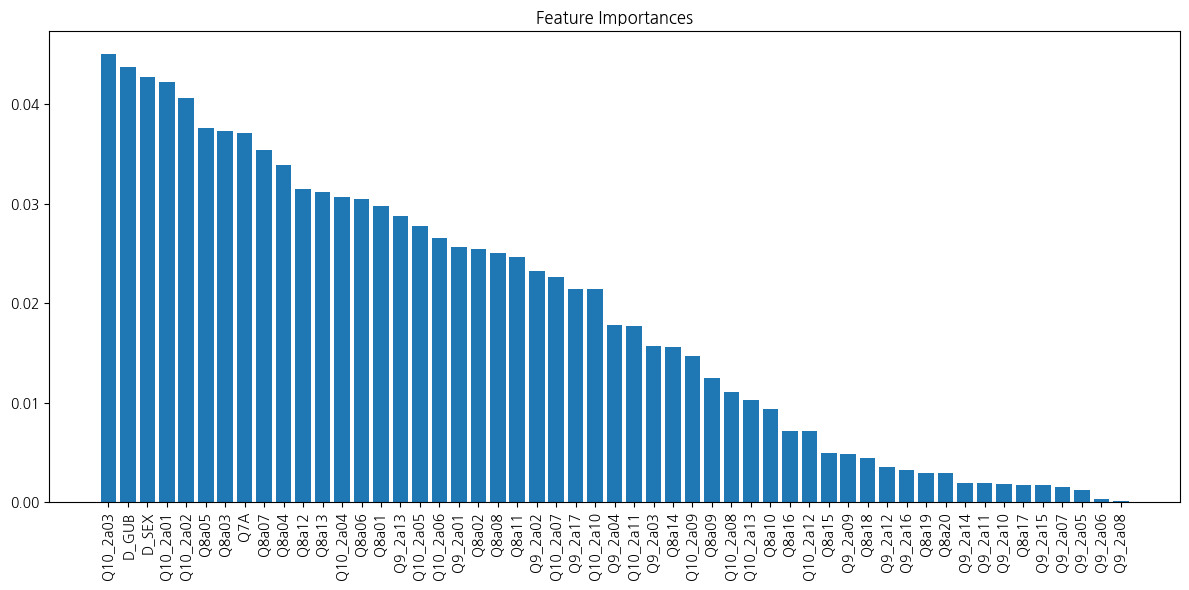

In [ ]:
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]
features = X.columns

plt.figure(figsize=(12, 6))
plt.title("Feature Importances")
plt.bar(range(len(features)), importances[indices], align="center")
plt.xticks(range(len(features)), features[indices], rotation=90)
plt.tight_layout()
plt.show()

In [ ]:
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]
features = X.columns

# 변수명과 중요도 숫자 함께 보기
feat_imp_df = pd.DataFrame({
    'feature': features[indices],
    'importance': importances[indices]
})

print(feat_imp_df)

     feature  importance
0   Q10_2a03    0.045085
1      D_GUB    0.043790
2      D_SEX    0.042781
3   Q10_2a01    0.042263
4   Q10_2a02    0.040650
5      Q8a05    0.037628
6      Q8a03    0.037333
7        Q7A    0.037084
8      Q8a07    0.035442
9      Q8a04    0.033897
10     Q8a12    0.031495
11     Q8a13    0.031178
12  Q10_2a04    0.030652
13     Q8a06    0.030487
14     Q8a01    0.029727
15   Q9_2a13    0.028753
16  Q10_2a05    0.027791
17  Q10_2a06    0.026560
18   Q9_2a01    0.025646
19     Q8a02    0.025438
20     Q8a08    0.025077
21     Q8a11    0.024652
22   Q9_2a02    0.023260
23  Q10_2a07    0.022643
24   Q9_2a17    0.021459
25  Q10_2a10    0.021388
26   Q9_2a04    0.017760
27  Q10_2a11    0.017739
28   Q9_2a03    0.015659
29     Q8a14    0.015583
30  Q10_2a09    0.014731
31     Q8a09    0.012456
32  Q10_2a08    0.011027
33  Q10_2a13    0.010270
34     Q8a10    0.009387
35     Q8a16    0.007149
36  Q10_2a12    0.007141
37     Q8a15    0.004916
38   Q9_2a09    0.004801


                          importance
참여 활동(Q8a01~Q8a20)          0.403875
쇼핑 항목(Q10_2a01~Q10_2a13)    0.317940
방문 지역(Q9_2a01~Q9_2a17)      0.154531
D_GUB                       0.043790
D_SEX                       0.042781
Q7A                         0.037084


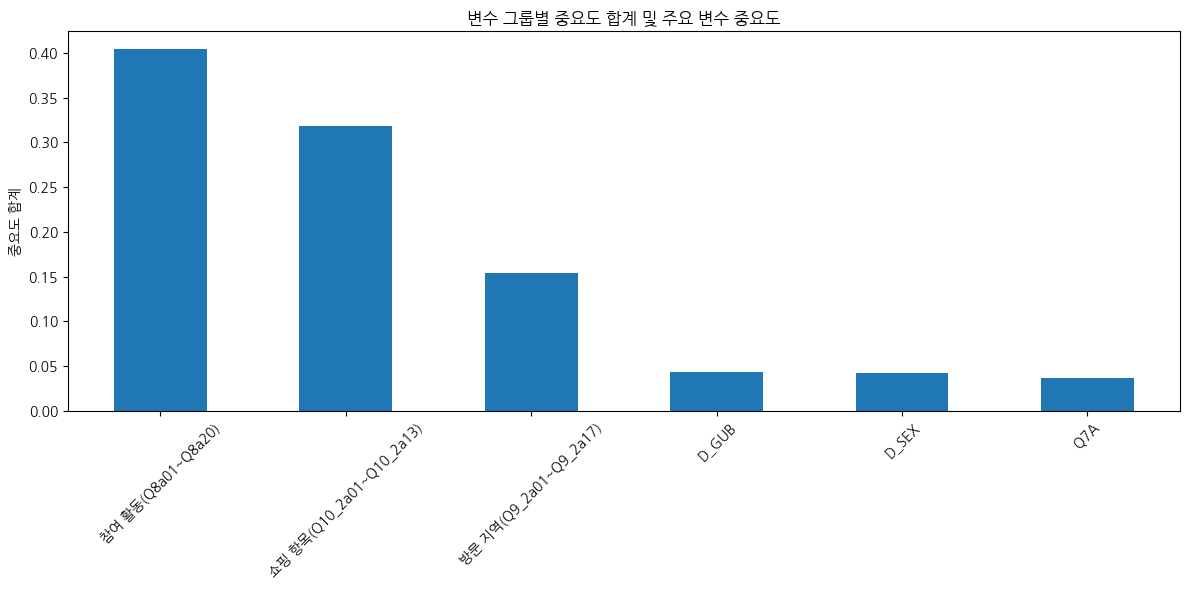

In [ ]:
# 전체 중요도 데이터
fi = pd.DataFrame({
    'feature': ['Q10_2a03', 'D_GUB', 'D_SEX', 'Q10_2a01', 'Q10_2a02', 'Q8a05', 'Q8a03', 'Q7A', 'Q8a07', 'Q8a04',
                'Q8a12', 'Q8a13', 'Q10_2a04', 'Q8a06', 'Q8a01', 'Q9_2a13', 'Q10_2a05', 'Q10_2a06', 'Q9_2a01', 'Q8a02',
                'Q8a08', 'Q8a11', 'Q9_2a02', 'Q10_2a07', 'Q9_2a17', 'Q10_2a10', 'Q9_2a04', 'Q10_2a11', 'Q9_2a03', 'Q8a14',
                'Q10_2a09', 'Q8a09', 'Q10_2a08', 'Q10_2a13', 'Q8a10', 'Q8a16', 'Q10_2a12', 'Q8a15', 'Q9_2a09', 'Q8a18',
                'Q9_2a12', 'Q9_2a16', 'Q8a19', 'Q8a20', 'Q9_2a14', 'Q9_2a11', 'Q9_2a10', 'Q8a17', 'Q9_2a15', 'Q9_2a07',
                'Q9_2a05', 'Q9_2a06', 'Q9_2a08'],
    'importance': [0.045085, 0.043790, 0.042781, 0.042263, 0.040650, 0.037628, 0.037333, 0.037084, 0.035442, 0.033897,
                   0.031495, 0.031178, 0.030652, 0.030487, 0.029727, 0.028753, 0.027791, 0.026560, 0.025646, 0.025438,
                   0.025077, 0.024652, 0.023260, 0.022643, 0.021459, 0.021388, 0.017760, 0.017739, 0.015659, 0.015583,
                   0.014731, 0.012456, 0.011027, 0.010270, 0.009387, 0.007149, 0.007141, 0.004916, 0.004801, 0.004433,
                   0.003507, 0.003267, 0.002936, 0.002908, 0.001947, 0.001893, 0.001789, 0.001753, 0.001716, 0.001495,
                   0.001226, 0.000299, 0.000054]
})

group_dict = {
    '참여 활동(Q8a01~Q8a20)': [f'Q8a{str(i).zfill(2)}' for i in range(1, 21)],
    '방문 지역(Q9_2a01~Q9_2a17)': [f'Q9_2a{str(i).zfill(2)}' for i in range(1, 18)],
    '쇼핑 항목(Q10_2a01~Q10_2a13)': [f'Q10_2a{str(i).zfill(2)}' for i in range(1, 14)],
}

group_importance = {}

# 그룹별 중요도 합산
for group_name, cols in group_dict.items():
    group_importance[group_name] = fi.loc[fi['feature'].isin(cols), 'importance'].sum()

# 원핫 인코딩 안 된 변수들 직접 추가
non_ohe_vars = ['Q7A', 'D_SEX', 'D_GUB']

for var in non_ohe_vars:
    group_importance[var] = fi.loc[fi['feature'] == var, 'importance'].sum()

# 결과 DataFrame 변환 및 정렬
group_importance_df = pd.DataFrame.from_dict(group_importance, orient='index', columns=['importance'])
group_importance_df = group_importance_df.sort_values(by='importance', ascending=False)

print(group_importance_df)

# 시각화
plt.figure(figsize=(12,6))
group_importance_df['importance'].plot(kind='bar')
plt.title('변수 그룹별 중요도 합계 및 주요 변수 중요도')
plt.ylabel('중요도 합계')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

*   나름 중요하다고 생각하는 변수 넣고 해도 결과가 잘 안 나옴.
*   불균형 때문에 class_weight='balanced' 적용, SMOT 해봤는데도 ROC AUC 점수가 구림
* 공모전 수상작들(맞춤형 관광, 전라도) 보니까 다른거 다 숨기고 정확도만 보여줌
* 정확도는 나도 높게 나옴..